A receiver operating characteristic curve(ROC), is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

This diagnostic ability is represented by the True Positive Rate (TPR) and False Positive Rate (FPR).

Area Under the Curve (AUC) is the entire 2D area spanned by the ROC curve.AUC provides an aggregate measure of performance across all possible classification thresholds

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(palette='rainbow', context='talk')

In [13]:
pip install drawdata

  Found existing installation: parso 0.5.1
    Uninstalling parso-0.5.1:
      Successfully uninstalled parso-0.5.1
  Found existing installation: jedi 0.15.1
    Uninstalling jedi-0.15.1:
      Successfully uninstalled jedi-0.15.1
  Found existing installation: ipython 7.8.0
    Uninstalling ipython-7.8.0:
      Successfully uninstalled ipython-7.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.


In [2]:
from drawdata import draw_scatter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve

The drawdata library has been used to generate a dataset for this task. The target variable is binary in nature.

In [3]:
draw_scatter()


In [2]:
df = pd.read_csv("./data.csv")


In [3]:
df

,x,y,z
0,393.3645,440.6560,a
1,346.8681,400.9283,a
2,345.5804,416.0991,a
3,314.0309,437.9480,a
4,272.6155,441.5795,a
...,...,...,...
287,162.0116,332.8159,b
288,181.5661,354.3031,b
289,189.6132,362.8839,b
290,186.3950,363.9326,b


In [4]:
df['z'].loc[df['z']=='a']=0
df['z'].loc[df['z']=='b']=1

E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
from sklearn.model_selection import train_test_split
X=df[['x','y']]
y=df['z']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)#30% test data


In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
ypred_prob=lr.predict_proba(X_test)[:,1]


In [7]:
ypred_prob#Probabilties obtained as a result of logistic function

array([0.2180862 , 0.16403832, 0.65406954, 0.05062182, 0.33437513,
       0.31198275, 0.06203216, 0.62999975, 0.95017847, 0.11376   ,
       0.94399834, 0.49591212, 0.48817412, 0.27223394, 0.04527111,
       0.77404235, 0.76826887, 0.44247426, 0.65966286, 0.17546902,
       0.11507977, 0.37943748, 0.73120055, 0.97866379, 0.46330659,
       0.25249767, 0.18147698, 0.15623988, 0.35550534, 0.88500679,
       0.06218244, 0.09344177, 0.10648064, 0.12109094, 0.70423538,
       0.63909554, 0.11436526, 0.56362074, 0.88972426, 0.64002583,
       0.27223878, 0.96098773, 0.07973709, 0.06459732, 0.0560486 ,
       0.94688643, 0.5299175 , 0.73387013, 0.11883595, 0.86988114,
       0.1058814 , 0.15786373, 0.02099533, 0.8591572 , 0.03256306,
       0.18858343, 0.78264607, 0.46542549, 0.11570155, 0.89403782,
       0.58892992, 0.30061057, 0.35862044, 0.38729285, 0.36618761,
       0.88028829, 0.97443328, 0.13796599, 0.52414264, 0.1759797 ,
       0.36794889, 0.96486547, 0.05045189, 0.54724425, 0.27522

In [8]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, ypred_prob, pos_label=1)

Fpr,Tpr and thresholds have been extracted using the built in roc_curve

In [9]:
tpr

array([0.        , 0.02325581, 0.44186047, 0.44186047, 0.48837209,
       0.48837209, 0.53488372, 0.53488372, 0.58139535, 0.58139535,
       0.69767442, 0.69767442, 0.72093023, 0.72093023, 0.74418605,
       0.74418605, 0.76744186, 0.76744186, 0.88372093, 0.88372093,
       0.93023256, 0.93023256, 0.95348837, 0.95348837, 0.97674419,
       0.97674419, 1.        , 1.        ])

In [10]:
thresh#these are the various threshold values according to which the logistic regression classifier has been tested

array([1.97866379, 0.97866379, 0.78183682, 0.77404235, 0.73387013,
       0.73120055, 0.70423538, 0.65966286, 0.64002583, 0.63909554,
       0.54724425, 0.52414264, 0.49591212, 0.48817412, 0.48460912,
       0.46542549, 0.46330659, 0.411145  , 0.36318202, 0.27522858,
       0.27223394, 0.25249767, 0.2180862 , 0.1759797 , 0.17546902,
       0.15623988, 0.13796599, 0.02099533])

In [11]:
random_probs = [0 for i in range(len(y_test))]


In [22]:
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [13]:
from sklearn.metrics import roc_auc_score


auc_score = roc_auc_score(y_test, ypred_prob)


print(auc_score)

0.896640826873385


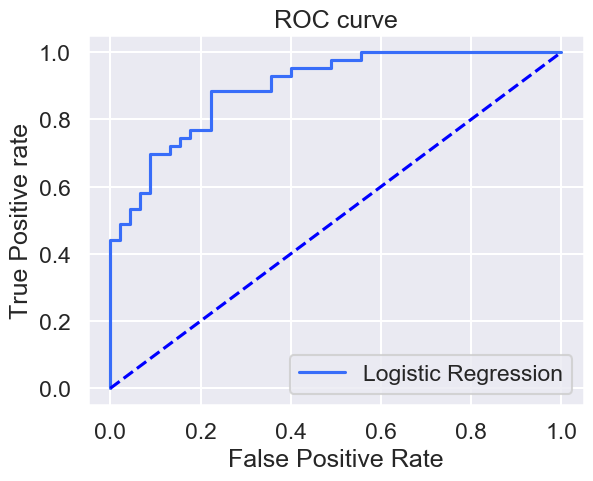

In [14]:
plt.plot(fpr, tpr,label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show()

In the case of class imbalance, obtaining the best threshold value can greatly improve performance of the classifier. In order to obtain that value geometric mean has been calculated.

In [16]:
gmeans = np.sqrt(tpr * (1-fpr))

In [18]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresh[ix], gmeans[ix]))

Best Threshold=0.363182, G-Mean=0.829


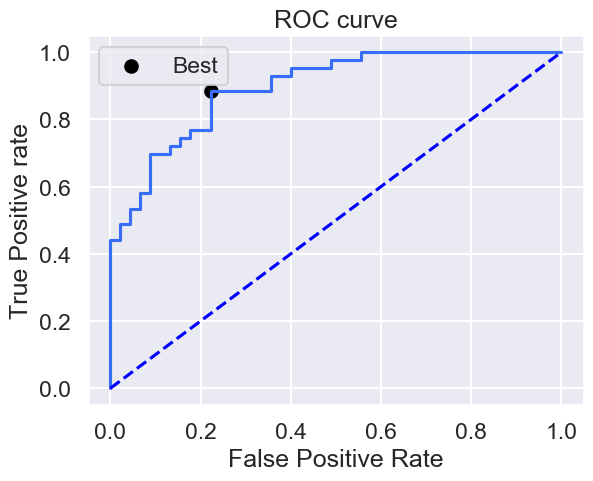

In [21]:
plt.plot(fpr, tpr,label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show()